In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [7]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 3)
print(X.shape, y.shape)
print(X, y)

(1000, 20) (1000,)
[[ -8.52381793   5.24451077 -12.14967704 ...   1.05057966   0.6975331
    0.26076035]
 [ -0.05916285  -3.54893654   0.28450157 ...   2.25695685   1.22878976
   -2.35705572]
 [  1.43722964  -2.7930806    3.06777424 ...   7.17348666   2.7348798
   -5.86519533]
 ...
 [  3.16342902  -9.33711497   9.98425127 ...  -2.10531942  -0.81155073
   -1.87188942]
 [ -9.02657972   2.59981304  -4.6665526  ...  -1.4839017   -1.30836833
    0.22976655]
 [ -2.91686079   2.27957528  -1.00615184 ...  -0.67922735  -2.84990903
   -2.06836683]] [0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 1 0 

In [6]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1, error_score = 'raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.023)


In [8]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant=5, random_state=3)
model = RandomForestClassifier()
model.fit(X, y)
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std

X, y = make_regression(n_samples = 1000, n_features = 20, n_informative = 15, noise = 0.1, random_state = 2)
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.159 (7.848)


In [3]:
X, y = make_regression(n_samples = 1000, n_features = 20, n_informative = 15, noise = 0.1, random_state = 2)
model = RandomForestRegressor()
model.fit(X, y)
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -137


>0.1 0.851 (0.030)
>0.2 0.877 (0.034)
>0.3 0.884 (0.026)
>0.4 0.888 (0.027)
>0.5 0.892 (0.025)
>0.6 0.894 (0.031)
>0.7 0.897 (0.025)
>0.8 0.905 (0.023)
>0.9 0.904 (0.023)
>1.0 0.900 (0.024)


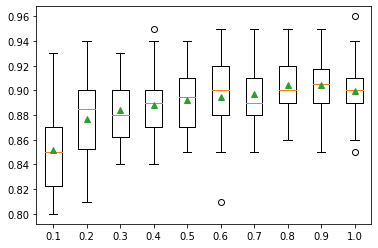

In [4]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_dataset():
  X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 3)
  return X, y

def get_models():
  models = dict()
  for i in arange(0.1, 1.1, 0.1):
    key = '%.1f' % i
    if i == 1.0:
      i = None
    models[key] = RandomForestClassifier(max_samples=i)
  return models

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
	scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs = -1)
	return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.887 (0.025)
>2 0.901 (0.025)
>3 0.905 (0.027)
>4 0.899 (0.024)
>5 0.902 (0.024)
>6 0.903 (0.022)
>7 0.897 (0.025)


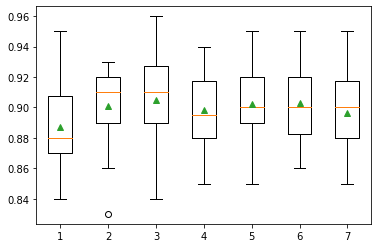

In [5]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
def get_dataset():
	X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 3)
	return X, y
 
def get_models():
	models = dict()
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
	scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
	return scores
 
X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.861 (0.030)
>50 0.901 (0.030)
>100 0.903 (0.022)
>500 0.905 (0.027)
>1000 0.908 (0.024)


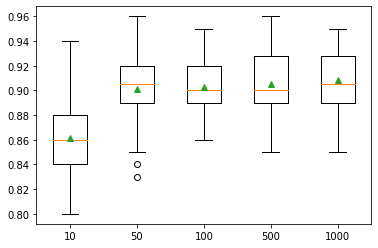

In [7]:
def get_models_3():
	models = dict()
	n_trees = [10, 50, 100, 500, 1000]

	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

X, y = get_dataset()
models = get_models_3()
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.768 (0.043)
>2 0.809 (0.037)
>3 0.839 (0.031)
>4 0.859 (0.026)
>5 0.869 (0.025)
>6 0.881 (0.026)
>7 0.892 (0.028)
>None 0.905 (0.023)


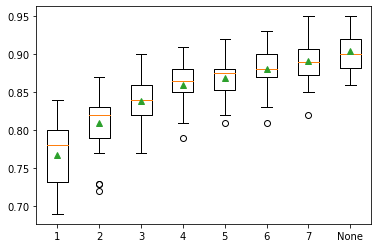

In [9]:
def get_models_4():
	models = dict()
	depths = [i for i in range(1,8)] + [None]

	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth = n)
	return models

X, y = get_dataset()
models = get_models_4()
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Comentarios del ejercicio
#### How to Develop a Random Forest Ensemble in Python

El algoritmo de Random Forest realiza un rejuntado de árboles de decisión, para que, se puedan ponderar los resultados de cada árbol y así ofrecer un solo resultado como parte de modelo de predicción. La idea es que cada árbol utilice un subconjunto del set de datos que pueda ser diferente al subconjunto que utilice otro árbol (*boostrat samples*) de manera que arrojen resultados distintos entre sí. En caso de problemas de regresión, se pondera el resultado de los árboles de decisión, mientras que para problemas de clasificación, el resultado es aquel que haya sido arrojado por mayor cantidad de árboles.
Existen ciertos hiperparámetros que pueden configurarse en el algoritmo para que se adapten mejor a un conjunto de datos, los cuales se pueden configurar a prueba y error. El primero es *max_samples*, un valor decimal entre 0 y 1, el cual define qué porcentaje del conjunto de datos va a usar cada árbol, entre más pequeño el valor, mayor diferencia entre los árboles. El siguiente es el número de *features*, el cual por defecto es la raíz cuadrada del total de *features* del set de datos. Por último, se puede configurar el valor del número de árboles y la profundidad máxima de cada árbol.
Como dudas, no me quedó claro el concepto de *split* que lo mencionan al inicio del tutorial, también me queda la duda si existen otros hiperparámetros que se puedan configurar.

# Comentarios sobre parámetros

Hay hiperparámetros que si se configuran en un valor muy alto, puede hacer que el modelo tarde más tiempo de lo habitual en arrojar resultados, como en el caso del número de árboles y la profundidad máxima de cada árbol. También, se ve como no es necesario llegar a valores tan pequeños o tan altos para obtener los mejores resultados, tal es el caso del número de *features* elegidos para el modelo. En el caso de *max_samples*, la teoría indica que es mejor si los árboles son distintos entre sí, sin embargo, dependiendo del dataset, es posible que utilizar el mismo *sample* en todos los árboles puede arrojar mejores resultados.